[3.3]实现对率回归，给出西瓜数据集3.0a结果。

In [32]:
import pandas as pd
dataset = pd.read_csv('3.0a.csv')
dataset
x = dataset[["密度", "含糖率"]]
y = dataset['好瓜']
good_melon = dataset[dataset['好瓜'] == 1]
bad_melon = dataset[dataset['好瓜'] == 0]


       密度     含糖率
0   0.697  0.4600
1   0.774  0.3760
2   0.634  0.2640
3   0.608  0.3180
4   0.556  0.2150
5   0.403  0.2370
6   0.481  0.1490
7   0.437  0.2110
8   0.666  0.0910
9   0.243  0.0267
10  0.245  0.0570
11  0.343  0.0990
12  0.639  0.1610
13  0.657  0.1980
14  0.360  0.3700
15  0.593  0.0420
16  0.719  0.1030


D:\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


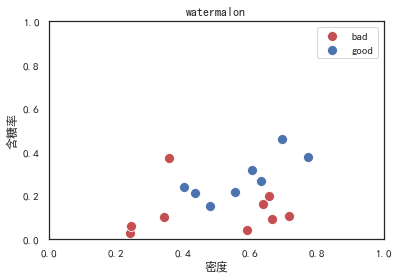

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
print(x)
f1 = plt.figure(1)
plt.title('watermalon')
plt.xlabel('密度')
plt.ylabel('含糖率')
plt.xlim(0, 1)
plt.ylim(0, 1)
sns.scatterplot(bad_melon["密度"], bad_melon["含糖率"],
            marker='o', color='r', s=100, label='bad')
sns.scatterplot(good_melon["密度"], good_melon["含糖率"],
            marker='o', color='b', s=100, label='good')
plt.legend(loc='upper right')


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test,Y_train,Y_test = train_test_split(
    x, y, test_size=0.5, random_state=0)
print(X_train, X_test)


       密度    含糖率
7   0.437  0.211
16  0.719  0.103
11  0.343  0.099
3   0.608  0.318
0   0.697  0.460
5   0.403  0.237
15  0.593  0.042
12  0.639  0.161        密度     含糖率
1   0.774  0.3760
6   0.481  0.1490
8   0.666  0.0910
9   0.243  0.0267
13  0.657  0.1980
4   0.556  0.2150
2   0.634  0.2640
14  0.360  0.3700
10  0.245  0.0570


[[4 1]
 [1 3]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.75      0.75      0.75         4

    accuracy                           0.78         9
   macro avg       0.78      0.78      0.78         9
weighted avg       0.78      0.78      0.78         9

[[-0.07509754  0.39827223]]
[0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56

D:\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


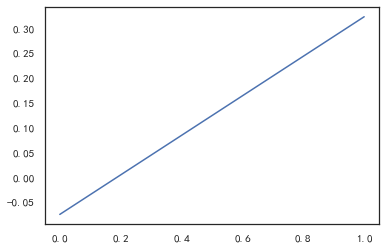

In [48]:
import numpy as np


def log_regression():
    log_regression = LogisticRegression()
    log_regression.fit(X_train, Y_train)
    y_pred = log_regression.predict(X_test)
    print(metrics.confusion_matrix(Y_test, y_pred))
    print(metrics.classification_report(Y_test, y_pred))
    print(log_regression.coef_)
    theta1, theta2 = log_regression.coef_[0][0], log_regression.coef_[0][1]
    x_pred = np.linspace(0, 1, 100)
    print (x_pred)
    line_pred = theta1+theta2*x_pred
    print(line_pred)
    sns.lineplot(x_pred, line_pred)
    plt.show()
    pass


log_regression()
